In [104]:
import numpy as np
import pandas as pd
from scipy import stats
import datetime
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
t_result= pd.read_csv('test_results.csv', parse_dates = ['timestamp'])
user_t = pd.read_csv('user_table.csv')

In [106]:
t_result.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [107]:
t_result['timestamp'].head() 
#pd.DatetimeIndex(t_result['timestamp']).normalize()   ## There are some data with minutes bigger than 60. 
#t_result['timestamp'].apply(lambda x : x.strftime('%Y-%m-%d'))
#pd.DatetimeIndex(t_result['timestamp'])
#t_result['timestamp']
#t_result['timestamp'].apply(lambda x : x.split(' ', expand = True)[0])
t_result['timestamp']= t_result['timestamp'].str.split(' ', expand = True)[0]
t_result['timestamp']
t_result['timestamp']= pd.DatetimeIndex(t_result['timestamp'])
t_result['timestamp']

0        2015-05-08
1        2015-05-10
2        2015-04-04
3        2015-05-07
4        2015-05-24
5        2015-04-13
6        2015-03-04
7        2015-03-15
8        2015-03-28
9        2015-04-24
10       2015-04-17
11       2015-05-15
12       2015-04-24
13       2015-03-21
14       2015-05-29
15       2015-03-22
16       2015-03-16
17       2015-03-08
18       2015-03-28
19       2015-03-04
20       2015-04-04
21       2015-05-03
22       2015-05-31
23       2015-05-16
24       2015-03-05
25       2015-03-28
26       2015-04-25
27       2015-05-31
28       2015-03-22
29       2015-03-15
            ...    
316770   2015-04-10
316771   2015-05-23
316772   2015-03-07
316773   2015-05-19
316774   2015-04-17
316775   2015-05-25
316776   2015-04-30
316777   2015-05-17
316778   2015-04-02
316779   2015-04-06
316780   2015-05-31
316781   2015-04-12
316782   2015-05-05
316783   2015-03-15
316784   2015-03-06
316785   2015-03-13
316786   2015-03-07
316787   2015-03-21
316788   2015-03-13


In [109]:
t_result =t_result.sort_values(['timestamp'])

In [110]:
user_t.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [111]:
t_table = t_result.merge(user_t, on = 'user_id', how = 'outer')

In [112]:
t_table.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,889040,2015-03-02,ads_facebook,web,windows,1,59,0,Grand Forks,USA,47.92,-97.07
1,331811,2015-03-02,ads_facebook,mobile,other,0,39,0,Coral Springs,USA,26.27,-80.26
2,83333,2015-03-02,friend_referral,web,windows,0,39,0,San Jose,USA,37.30,-121.85
3,449771,2015-03-02,ads_facebook,web,windows,0,39,0,Concord,USA,43.23,-71.56
4,691611,2015-03-02,ads_other,mobile,android,0,39,0,Los Angeles,USA,34.11,-118.41


In [113]:
np.sum(t_table.isnull())

user_id                 0
timestamp               0
source                  0
device                  0
operative_system        0
test                    0
price                   0
converted               0
city                41184
country             41184
lat                 41184
long                41184
dtype: int64

In [114]:
t_table[t_table['city'].isnull()].head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
7,940779,2015-03-02,seo-other,web,windows,1,59,0,NaN,NaN,NaN,NaN
8,238369,2015-03-02,ads_facebook,mobile,iOS,0,39,0,NaN,NaN,NaN,NaN
17,88443,2015-03-02,ads-google,mobile,iOS,1,59,0,NaN,NaN,NaN,NaN
21,694803,2015-03-02,ads-google,mobile,iOS,0,39,0,NaN,NaN,NaN,NaN
26,810010,2015-03-02,ads-google,mobile,android,1,59,0,NaN,NaN,NaN,NaN


In [115]:
s,p = stats.ttest_ind(t_table.loc[t_table['test']==1, 'converted'], t_table.loc[t_table['test']==0, 'converted'])
p

1.587879980534333e-18

The p-value indicates that we can reject the hypothesis that they are not related.
The data is biased. 

In [116]:
### remove the indexes where NAN values present
t_table = t_table.loc[t_table['city'].isnull() == False]

In [117]:
t_table[t_table['city'].isnull()].head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long


In [118]:
np.sum(t_table.isnull())

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
city                0
country             0
lat                 0
long                0
dtype: int64

In [119]:
t_table.head(
)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,889040,2015-03-02,ads_facebook,web,windows,1,59,0,Grand Forks,USA,47.92,-97.07
1,331811,2015-03-02,ads_facebook,mobile,other,0,39,0,Coral Springs,USA,26.27,-80.26
2,83333,2015-03-02,friend_referral,web,windows,0,39,0,San Jose,USA,37.30,-121.85
3,449771,2015-03-02,ads_facebook,web,windows,0,39,0,Concord,USA,43.23,-71.56
4,691611,2015-03-02,ads_other,mobile,android,0,39,0,Los Angeles,USA,34.11,-118.41


In [120]:
print(
    '\nConversion rate for test;\t ',t_table.loc[t_table['test']==1, 'converted'].mean(),
    '\nConversion rate for control:\t ',t_table.loc[t_table['test']==0, 'converted'].mean(),
    '\nAverage gain for test:\t ',t_table.loc[t_table['test']==1, 'converted'].mean()*59, 
    '\nAverage gain for control:\t ',t_table.loc[t_table['test']==0, 'converted'].mean()*39)


Conversion rate for test;	  0.015425253054805016 
Conversion rate for control:	  0.019775772553109482 
Average gain for test:	  0.9100899302334959 
Average gain for control:	  0.7712551295712698


We can plot out the conversion ratio VS date to see if there is any change

In [121]:
ratio = t_table[t_table['test']==1].groupby('timestamp')['converted'].mean()/t_table[t_table['test']==0].groupby('timestamp')['converted'].mean()
#ratio
#t_table[t_table['test']==1].groupby('timestamp')['converted'].mean()
#t_table['timestamp'] = t_table['timestamp'].map(lambda x : x.hour= 0)

Text(0.5,1,'conversion ratio VS date')

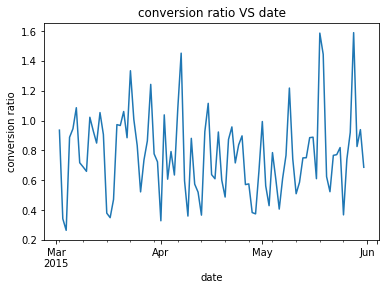

In [122]:
ax =ratio.plot()
ax.set_xlabel('date')
ax.set_ylabel('conversion ratio')
ax.set_title('conversion ratio VS date')


## It seems that for the lower price part (test = 0), the conversion rate is higher than the high price part (test =1).
## But the average gain for high price part is higher, because of the high price per each software
Now we have to check whether they are biased or not.

In [123]:
s,p = stats.ttest_ind(t_table.loc[t_table['test']==1, 'converted'], t_table.loc[t_table['test']==0, 'converted'])
p


2.4238758535335153e-16

# for A/B test both the control and test samples have to be the same except one feature
## If they are not, then other features must have affected the change in conversion rates

In here, 3 things have to be done:
1. plot the distribution of each feature for test and control
2. use a decision tree to see if any feature can predict whether it is test or control
3. use a t-test to verify results

# plot out the distribution of each variable 

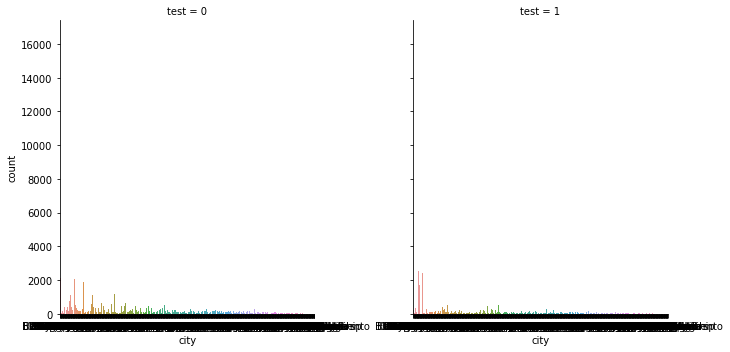

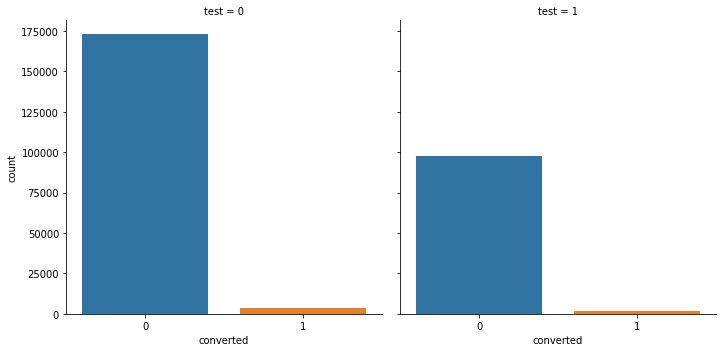

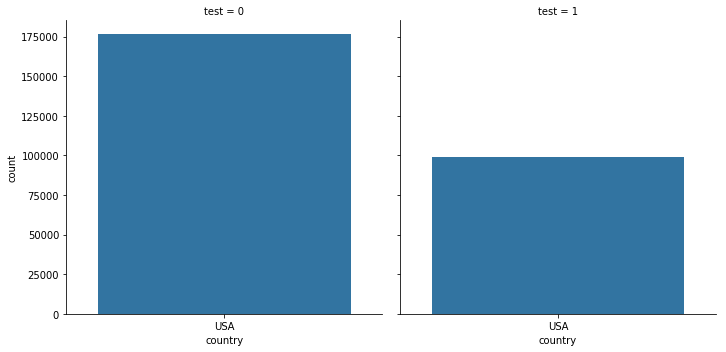

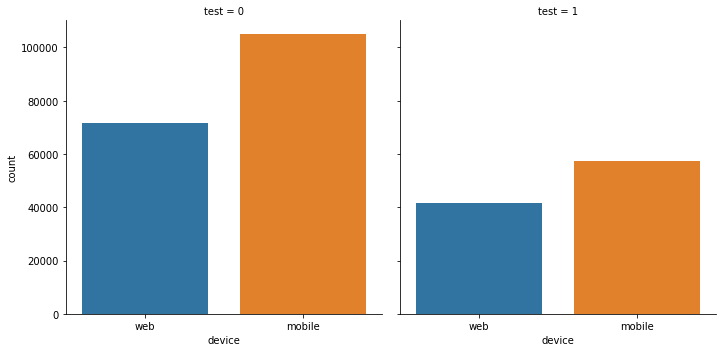

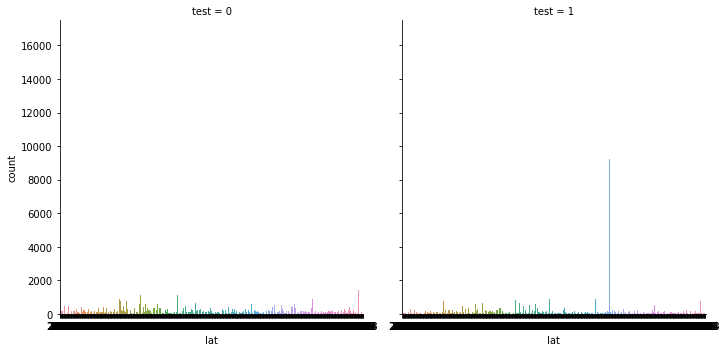

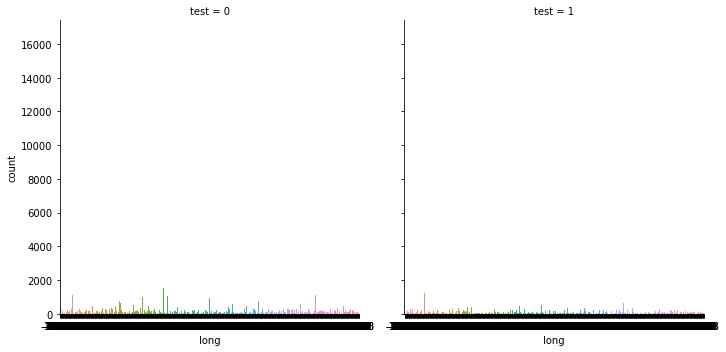

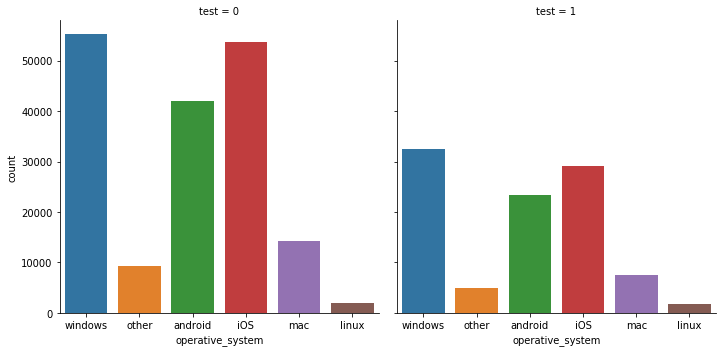

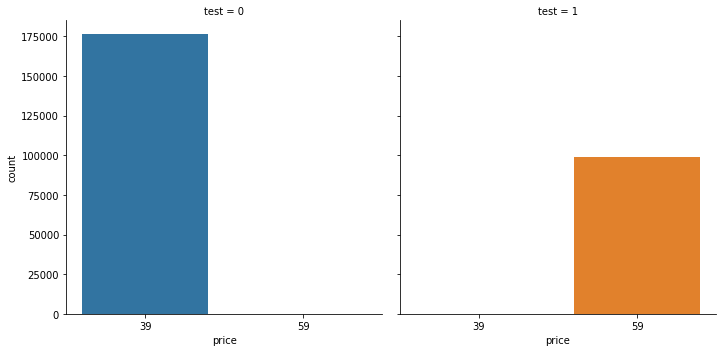

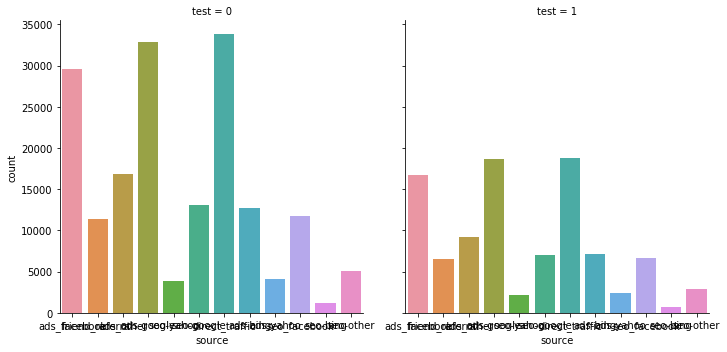

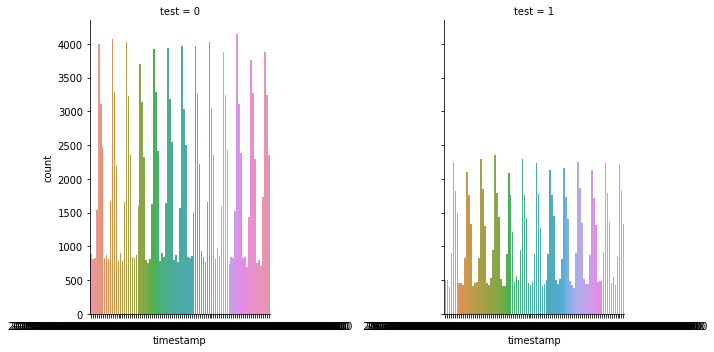

In [124]:
for i in t_table.columns.difference(['user_id','test']):
    sns.catplot(i, col= 'test', data = t_table, kind= 'count')

There are some difference in the city components, some cities get higher conversion rate for even higher prices. 
It could due to some bias data taken. 
Also, for different time period, the conversion rate is different for both categories. 

In [142]:
#lrv =DecisionTreeClassifier()
#lrv.fit()
#t_table =t_table.drop(['country'], axis =1)
#t_table =t_table.drop(['price'], axis =1)
df = t_table.drop(['country','price','user_id','converted','timestamp'], axis =1)

In [143]:
df.head()

,source,device,operative_system,test,city,lat,long
0,ads_facebook,web,windows,1,Grand Forks,47.92,-97.07
1,ads_facebook,mobile,other,0,Coral Springs,26.27,-80.26
2,friend_referral,web,windows,0,San Jose,37.30,-121.85
3,ads_facebook,web,windows,0,Concord,43.23,-71.56
4,ads_other,mobile,android,0,Los Angeles,34.11,-118.41


In [144]:
y = df['test']
X =pd.get_dummies(df.drop(['test'], axis = 1))

In [145]:
lrv_fit = DecisionTreeClassifier()
lrv_fit.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

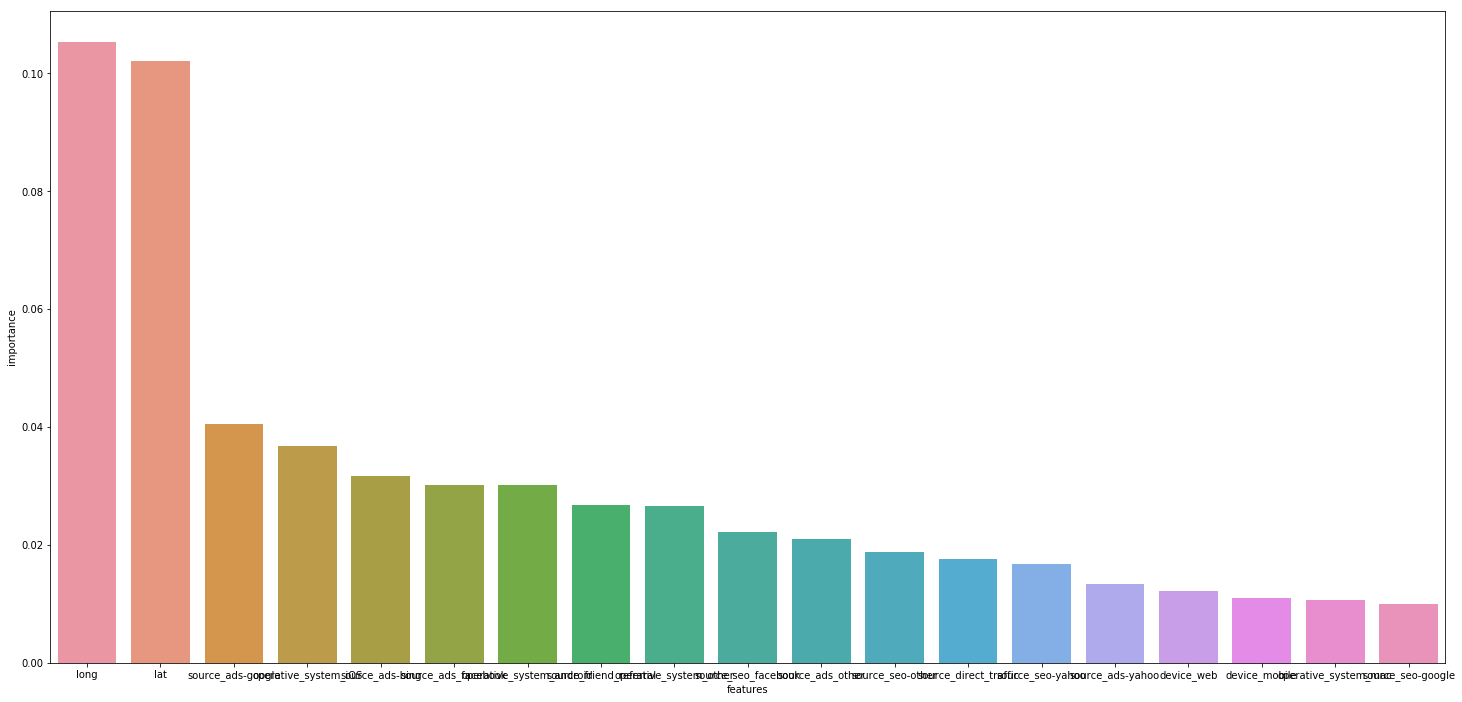

In [155]:
importance = lrv_fit.feature_importances_
Imp_feature= pd.DataFrame({'features':X.columns, 'importance':importance}).sort_values(by='importance', ascending = False)
_ =sns.barplot(Imp_feature.loc[:10,'features'],Imp_feature.loc[:10,'importance'])
_.figure.set_size_inches(25,12)
#Imp_feature[0]
#importance

We can see there are two predictive features: long and lat. 
We can verify whether the signal is biased by T-test

## Use t-test to verify results
First verify the features: long and lat, then other features like source

We can conclude that there is a bias in the data if the data comes insignificant for some features, but signidicant for others


In [159]:
s, p = stats.ttest_ind(t_table.loc[t_table['test']==1, 'long'],t_table.loc[t_table['test']==0, 'long'])
print(p)
s, p = stats.ttest_ind(t_table.loc[t_table['test']==1, 'lat'],t_table.loc[t_table['test']==0, 'lat'])
print(p)

0.9207306281886632
0.04388188409145197


## We can reject the hypothesis that test and control are unbias from the p-value of lat